In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time
import sys
sys.path.append("../../")
from src.util import bath_correlation_function
from src.util import debye_spectral_density

In this notebook we will test the code that (approximately) computes the bath correlation function (BCF)

\begin{equation}
        \alpha(\tau) = \frac{1}{\pi} \int_0^\infty J(\omega) \left(\coth\left(\frac{\omega\beta}{2}\right)\cos\left(\omega\tau\right) - i\sin\left(\omega\tau\right)\right) \text{d}\omega
\end{equation}

with spectral density $J(\omega)$.

# Exponential expansion of the BCF

First we will test the code that computes the exponential expansion of the BCF

\begin{equation}
    \alpha(\tau) = \sum_{j=1}^{\infty} g_j e^{-\omega_j \tau} \approx \sum_{j=1}^{N_\text{bath}} g_j e^{-\omega_j \tau}
\end{equation}

When given a spectral density, it is sometimes possible to compute the expansion analytically by using the residual theorem.

## First simple test

As a first test, we will look at the simple BCF which is used for the first example (spin-boson model) in the original HOPS paper:

\begin{equation}
    \alpha(\tau) = g e^{-\omega\tau}
\end{equation}
with
\begin{equation}
g = 2
\end{equation}
and
\begin{equation}
\omega = 0.5 + 2i
\end{equation}

In [3]:
g = np.array([2])
w = np.array([0.5+2j])

In [4]:
def alpha_compare(tau, g, omega):
    if tau >= 0:
        return np.sum(g*np.exp(-tau*omega))
    return np.sum(g*np.exp(tau*np.conj(omega)))

In [5]:
taus = np.linspace(0, 10, 1000)
alphas = bath_correlation_function.alpha(taus, g, w)
alphas_compare = np.array([alpha_compare(tau, g, w) for tau in taus])

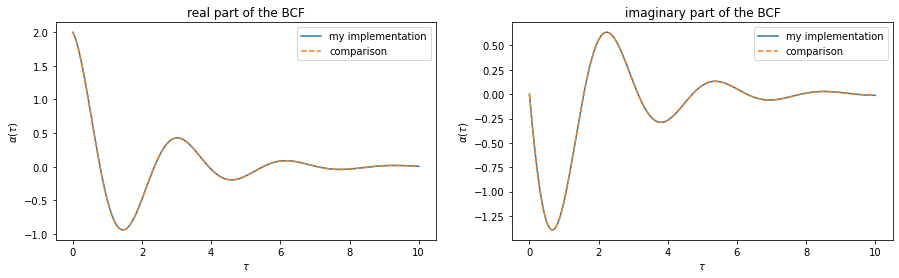

In [6]:
figure, axarray = plt.subplots(1, 2, figsize=(15, 4))
axarray[0].plot(taus, np.real(alphas), label="my implementation")
axarray[0].plot(taus, np.real(alphas_compare), "--", label="comparison")
axarray[0].set_xlabel(r"$\tau$")
axarray[0].set_ylabel(r"$\alpha(\tau)$")
axarray[0].set_title("real part of the BCF")
axarray[0].legend()
axarray[1].plot(taus, np.imag(alphas), label="my implementation")
axarray[1].plot(taus, np.imag(alphas_compare), "--", label="comparison")
axarray[1].set_xlabel(r"$\tau$")
axarray[1].set_ylabel(r"$\alpha(\tau)$")
axarray[1].set_title("imaginary part of the BCF")
axarray[1].legend()
plt.show()

## Second test using the debye spectral density

As a second example we will look at the debye spectral density

\begin{equation}
    S(\omega) = \eta \frac{\omega \gamma}{\omega^2 + \gamma^2}.
\end{equation}

Using the residual theorem one can then transform the BCF into a sum of exponentials as shown above, with coefficients

\begin{equation}
    g_0 = \frac{\eta\gamma}{2}\left(\cot\left(\frac{\gamma}{2T}\right)-i\right),\quad\omega_0 = \gamma,
\end{equation}

\begin{equation}
    g_j = -\eta\frac{4\pi T^2\left(j-1\right)\gamma}{\gamma^2-4\pi^2T^2\left(j-1\right)^2}, \quad \omega_j = 2\pi T\left(j-1\right) \quad \forall j \ge 1
\end{equation}

As in the first example (spin boson model) in the HOMPS paper, we will use $\eta = 0.5$ and look at two cases: high temperature with low damping, $\beta_1 = 0.5$, $\gamma = 0.25$ and low temperature with high damping, $\beta_2 = 50$, $\gamma_2 = 5.0$, where

\begin{equation}
    \beta = 1/T.
\end{equation}

In [7]:
eta = 0.5
gamma_1 = 0.25
gamma_2 = 5.0

In [8]:
beta_1 = 0.5
T_1 = 1 / beta_1
beta_2 = 50
T_2 = 1 / beta_2

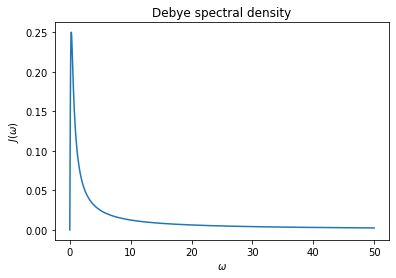

In [9]:
ws = np.linspace(0, 50, 1000)
plt.plot(ws, debye_spectral_density.debye_spectral_density(ws, eta, gamma_1))
plt.xlabel("$\omega$")
plt.ylabel("$J(\omega)$")
plt.title("Debye spectral density")
plt.show()

In [10]:
N_terms = 100

In [11]:
g_T_1, w_T_1 = debye_spectral_density.get_debye_coefficients(100, T_1, gamma_1, eta)
g_T_2, w_T_2 = debye_spectral_density.get_debye_coefficients(100, T_2, gamma_2, eta)

In [12]:
taus = np.linspace(0, 10, 1000)
alphas_T_1 = bath_correlation_function.alpha(taus, g_T_1, w_T_1)
alphas_compare_T_1 = np.array([alpha_compare(tau, g_T_1, w_T_1) for tau in taus])
alphas_T_2 = bath_correlation_function.alpha(taus, g_T_2, w_T_2)
alphas_compare_T_2 = np.array([alpha_compare(tau, g_T_2, w_T_2) for tau in taus])

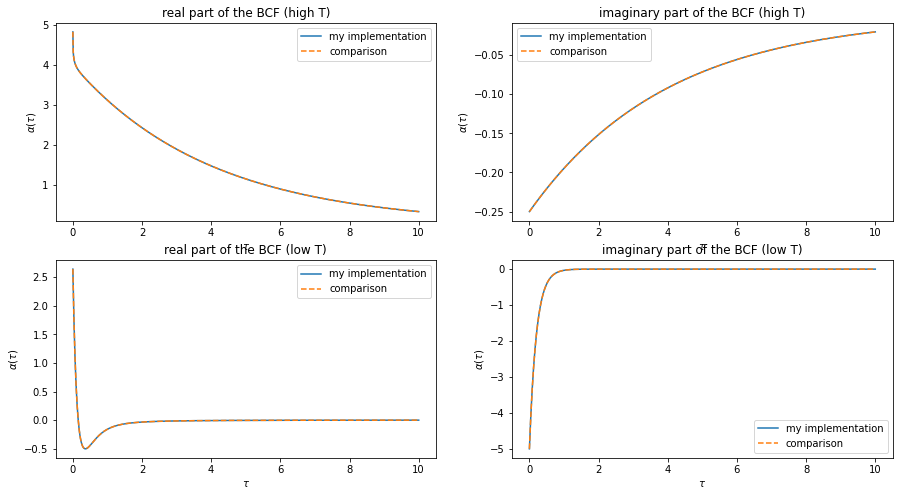

In [13]:
figure, axarray = plt.subplots(2, 2, figsize=(15, 8))
axarray[0][0].plot(taus, np.real(alphas_T_1), label="my implementation")
axarray[0][0].plot(taus, np.real(alphas_compare_T_1), "--", label="comparison")
axarray[0][0].set_xlabel(r"$\tau$")
axarray[0][0].set_ylabel(r"$\alpha(\tau)$")
axarray[0][0].set_title("real part of the BCF (high T)")
axarray[0][0].legend()

axarray[0][1].plot(taus, np.imag(alphas_T_1), label="my implementation")
axarray[0][1].plot(taus, np.imag(alphas_compare_T_1), "--", label="comparison")
axarray[0][1].set_xlabel(r"$\tau$")
axarray[0][1].set_ylabel(r"$\alpha(\tau)$")
axarray[0][1].set_title("imaginary part of the BCF (high T)")
axarray[0][1].legend()

axarray[1][0].plot(taus, np.real(alphas_T_2), label="my implementation")
axarray[1][0].plot(taus, np.real(alphas_compare_T_2), "--", label="comparison")
axarray[1][0].set_xlabel(r"$\tau$")
axarray[1][0].set_ylabel(r"$\alpha(\tau)$")
axarray[1][0].set_title("real part of the BCF (low T)")
axarray[1][0].legend()

axarray[1][1].plot(taus, np.imag(alphas_T_2), label="my implementation")
axarray[1][1].plot(taus, np.imag(alphas_compare_T_2), "--", label="comparison")
axarray[1][1].set_xlabel(r"$\tau$")
axarray[1][1].set_ylabel(r"$\alpha(\tau)$")
axarray[1][1].set_title("imaginary part of the BCF (low T)")
axarray[1][1].legend()
plt.show()

# Evaluating the BCF using `scipy.integrate.quad`

In this section we will test how well implementation works, that tries to numerically compute the integral in the bath_correlation function. Since the integral extends to infinity, we have to assume the integrand vanishes as $\omega \rightarrow \infty$, and only integrate up to a cut-off frequency $\omega_\text{cut}$. In the following, we will analyze the convergence of the integral with respect to $\omega_\text{cut}$.

In [14]:
taus = np.linspace(0, 10, 1000)
J_1 = lambda w : debye_spectral_density.debye_spectral_density(w, eta, gamma_1)
J_2 = lambda w : debye_spectral_density.debye_spectral_density(w, eta, gamma_2)

In [15]:
w_cuts = [5, 10, 20, 50, 100, 200, 500]
limit = 1000
alphas_quad_w_T_1 = np.empty((len(w_cuts), taus.shape[0]), dtype=complex)
alphas_quad_w_T_2 = np.empty((len(w_cuts), taus.shape[0]), dtype=complex)
for i, w_cut in enumerate(w_cuts):
    print("Computing w_cut =", w_cut, "...")
    start = time.time()
    alphas_quad_w_T_1[i, :] = np.array([bath_correlation_function.alpha_quad(tau, J_1, beta_1, w_cut, limit=limit) for tau in taus], dtype=complex)
    alphas_quad_w_T_2[i, :] = np.array([bath_correlation_function.alpha_quad(tau, J_2, beta_2, w_cut, limit=limit) for tau in taus], dtype=complex)
    end = time.time()
    print("took", end-start, "seconds.")
print("Done.")

Computing w_cut = 5 ...
took 1.1244473457336426 seconds.
Computing w_cut = 10 ...
took 1.8573017120361328 seconds.
Computing w_cut = 20 ...
took 3.333542585372925 seconds.
Computing w_cut = 50 ...
took 7.58777379989624 seconds.
Computing w_cut = 100 ...
took 14.972240209579468 seconds.
Computing w_cut = 200 ...
took 28.903645753860474 seconds.
Computing w_cut = 500 ...
took 76.88382887840271 seconds.
Done.


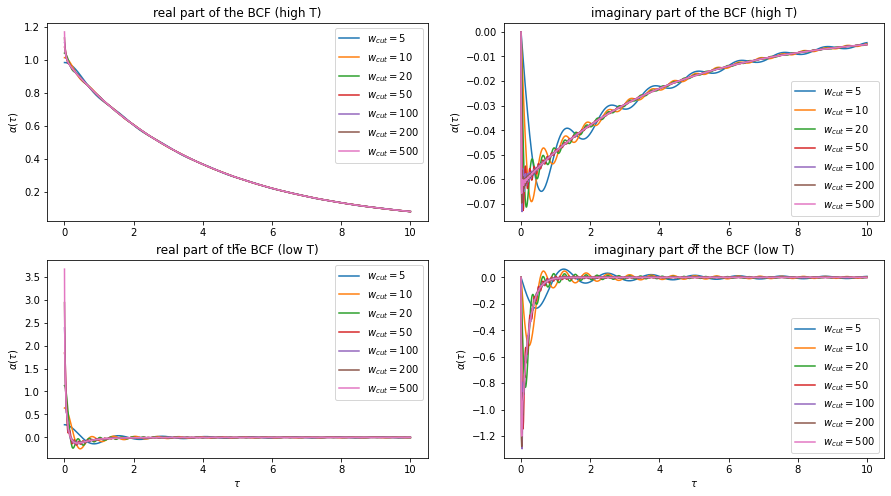

In [16]:
figure, axarray = plt.subplots(2, 2, figsize=(15, 8))
for i, w_cut in enumerate(w_cuts):
    axarray[0][0].plot(taus, np.real(alphas_quad_w_T_1[i]), label=r"$w_{cut} = "+str(w_cut)+"$")
    axarray[0][1].plot(taus, np.imag(alphas_quad_w_T_1[i]), label=r"$w_{cut} = "+str(w_cut)+"$")
    axarray[1][0].plot(taus, np.real(alphas_quad_w_T_2[i]), label=r"$w_{cut} = "+str(w_cut)+"$")
    axarray[1][1].plot(taus, np.imag(alphas_quad_w_T_2[i]), label=r"$w_{cut} = "+str(w_cut)+"$")
axarray[0][0].set_xlabel(r"$\tau$")
axarray[0][0].set_ylabel(r"$\alpha(\tau)$")
axarray[0][1].set_xlabel(r"$\tau$")
axarray[0][1].set_ylabel(r"$\alpha(\tau)$")
axarray[1][0].set_xlabel(r"$\tau$")
axarray[1][0].set_ylabel(r"$\alpha(\tau)$")
axarray[1][1].set_xlabel(r"$\tau$")
axarray[1][1].set_ylabel(r"$\alpha(\tau)$")
axarray[0][0].set_title("real part of the BCF (high T)")
axarray[0][1].set_title("imaginary part of the BCF (high T)")
axarray[1][0].set_title("real part of the BCF (low T)")
axarray[1][1].set_title("imaginary part of the BCF (low T)")
axarray[0][0].legend()
axarray[0][1].legend()
axarray[1][0].legend()
axarray[1][1].legend()
plt.show()

# Evaluating the BCF using a sum approximation

Alternatively, we can simply approximate the correlation function using a sum

\begin{equation}
\begin{split}
    \alpha(\tau) &= \frac{1}{\pi} \int_0^\infty J(\omega) \left(\coth\left(\frac{\omega\beta}{2}\right)\cos\left(\omega\tau\right) - i\sin\left(\omega\tau\right)\right) \text{d}\omega \\
    &\approx \frac{\Delta\omega}{\pi} \sum_{j=1}^{N} J(\omega_j) \left(\coth\left(\frac{\omega_j\beta}{2}\right)\cos\left(\omega_j\tau\right) - i\sin\left(\omega_j\tau\right)\right)
\end{split}
\end{equation}

with $\omega_j = \left(j-\frac{1}{2}\right)\Delta\omega$ and $N$ sufficiently large.

In [17]:
w_cuts = [5, 10, 20, 50, 100, 200, 500]
N = 3000
alphas_sum_w_T_1 = np.empty((len(w_cuts), taus.shape[0]), dtype=complex)
alphas_sum_w_T_2 = np.empty((len(w_cuts), taus.shape[0]), dtype=complex)
for i, w_cut in enumerate(w_cuts):
    print("computing N =", N, "...")
    start = time.time()
    dw = w_cut / N
    alphas_sum_w_T_1[i, :] = np.array([bath_correlation_function.alpha_sum(tau, J_1, beta_1, N, dw) for tau in taus], dtype=complex)
    alphas_sum_w_T_2[i, :] = np.array([bath_correlation_function.alpha_sum(tau, J_2, beta_2, N, dw) for tau in taus], dtype=complex)
    end = time.time()
    print("took", end-start, "seconds.")
print("Done.")

computing N = 3000 ...
took 0.23458147048950195 seconds.
computing N = 3000 ...
took 0.24251341819763184 seconds.
computing N = 3000 ...
took 0.23127317428588867 seconds.
computing N = 3000 ...
took 0.2311108112335205 seconds.
computing N = 3000 ...
took 0.2296586036682129 seconds.
computing N = 3000 ...
took 0.21802282333374023 seconds.
computing N = 3000 ...
took 0.20539569854736328 seconds.
Done.


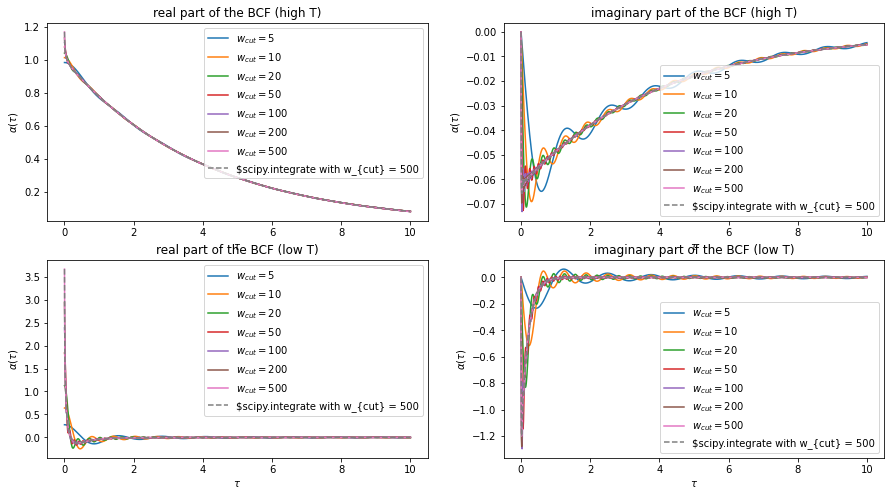

In [18]:
figure, axarray = plt.subplots(2, 2, figsize=(15, 8))
for i, w_cut in enumerate(w_cuts):
    axarray[0][0].plot(taus, np.real(alphas_sum_w_T_1[i]), label=r"$w_{cut} = "+str(w_cut)+"$")
    axarray[0][1].plot(taus, np.imag(alphas_sum_w_T_1[i]), label=r"$w_{cut} = "+str(w_cut)+"$")
    axarray[1][0].plot(taus, np.real(alphas_sum_w_T_2[i]), label=r"$w_{cut} = "+str(w_cut)+"$")
    axarray[1][1].plot(taus, np.imag(alphas_sum_w_T_2[i]), label=r"$w_{cut} = "+str(w_cut)+"$")
axarray[0][0].plot(taus, np.real(alphas_quad_w_T_1[-1]), "--", label=r"$scipy.integrate with w_{cut} = 500")
axarray[0][1].plot(taus, np.imag(alphas_quad_w_T_1[-1]), "--", label=r"$scipy.integrate with w_{cut} = 500")
axarray[1][0].plot(taus, np.real(alphas_quad_w_T_2[-1]), "--", label=r"$scipy.integrate with w_{cut} = 500")
axarray[1][1].plot(taus, np.imag(alphas_quad_w_T_2[-1]), "--", label=r"$scipy.integrate with w_{cut} = 500")
axarray[0][0].set_xlabel(r"$\tau$")
axarray[0][0].set_ylabel(r"$\alpha(\tau)$")
axarray[0][1].set_xlabel(r"$\tau$")
axarray[0][1].set_ylabel(r"$\alpha(\tau)$")
axarray[1][0].set_xlabel(r"$\tau$")
axarray[1][0].set_ylabel(r"$\alpha(\tau)$")
axarray[1][1].set_xlabel(r"$\tau$")
axarray[1][1].set_ylabel(r"$\alpha(\tau)$")
axarray[0][0].set_title("real part of the BCF (high T)")
axarray[0][1].set_title("imaginary part of the BCF (high T)")
axarray[1][0].set_title("real part of the BCF (low T)")
axarray[1][1].set_title("imaginary part of the BCF (low T)")
axarray[0][0].legend()
axarray[0][1].legend()
axarray[1][0].legend()
axarray[1][1].legend()
plt.show()

In [19]:
w_cut = 200
Ns = [500, 750, 1000, 2000, 3000]
alphas_sum_N_T_1 = np.empty((len(Ns), taus.shape[0]), dtype=complex)
alphas_sum_N_T_2 = np.empty((len(Ns), taus.shape[0]), dtype=complex)
for i, N in enumerate(Ns):
    print("computing N =", N, "...")
    start = time.time()
    dw = w_cut / N
    alphas_sum_N_T_1[i, :] = np.array([bath_correlation_function.alpha_sum(tau, J_1, beta_1, N, dw) for tau in taus], dtype=complex)
    alphas_sum_N_T_2[i, :] = np.array([bath_correlation_function.alpha_sum(tau, J_2, beta_2, N, dw) for tau in taus], dtype=complex)
    end = time.time()
    print("took", end-start, "seconds.")
print("Done.")

computing N = 500 ...
took 0.08098292350769043 seconds.
computing N = 750 ...
took 0.09425044059753418 seconds.
computing N = 1000 ...
took 0.10708093643188477 seconds.
computing N = 2000 ...
took 0.15966176986694336 seconds.
computing N = 3000 ...
took 0.21605539321899414 seconds.
Done.


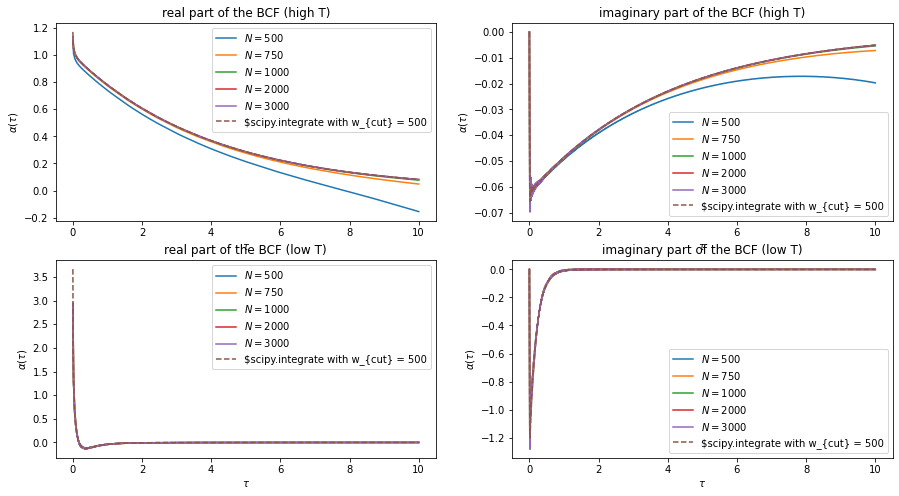

In [20]:
figure, axarray = plt.subplots(2, 2, figsize=(15, 8))
for i, N in enumerate(Ns):
    axarray[0][0].plot(taus, np.real(alphas_sum_N_T_1[i]), label=r"$N = "+str(N)+"$")
    axarray[0][1].plot(taus, np.imag(alphas_sum_N_T_1[i]), label=r"$N = "+str(N)+"$")
    axarray[1][0].plot(taus, np.real(alphas_sum_N_T_2[i]), label=r"$N = "+str(N)+"$")
    axarray[1][1].plot(taus, np.imag(alphas_sum_N_T_2[i]), label=r"$N = "+str(N)+"$")
axarray[0][0].plot(taus, np.real(alphas_quad_w_T_1[-1]), "--", label=r"$scipy.integrate with w_{cut} = 500")
axarray[0][1].plot(taus, np.imag(alphas_quad_w_T_1[-1]), "--", label=r"$scipy.integrate with w_{cut} = 500")
axarray[1][0].plot(taus, np.real(alphas_quad_w_T_2[-1]), "--", label=r"$scipy.integrate with w_{cut} = 500")
axarray[1][1].plot(taus, np.imag(alphas_quad_w_T_2[-1]), "--", label=r"$scipy.integrate with w_{cut} = 500")
axarray[0][0].set_xlabel(r"$\tau$")
axarray[0][0].set_ylabel(r"$\alpha(\tau)$")
axarray[0][1].set_xlabel(r"$\tau$")
axarray[0][1].set_ylabel(r"$\alpha(\tau)$")
axarray[1][0].set_xlabel(r"$\tau$")
axarray[1][0].set_ylabel(r"$\alpha(\tau)$")
axarray[1][1].set_xlabel(r"$\tau$")
axarray[1][1].set_ylabel(r"$\alpha(\tau)$")
axarray[0][0].set_title("real part of the BCF (high T)")
axarray[0][1].set_title("imaginary part of the BCF (high T)")
axarray[1][0].set_title("real part of the BCF (low T)")
axarray[1][1].set_title("imaginary part of the BCF (low T)")
axarray[0][0].legend()
axarray[0][1].legend()
axarray[1][0].legend()
axarray[1][1].legend()
plt.show()

The sum implementation does not have as many artifacts and is a lot faster!

# Testing the correctness of the exponential expansion of the BCF with Debye spectral density

In this last section we want to analyze how well the exponential expansion of the BCF usin the Debye spectral density (see above) compares to the other implementations.

In [23]:
N_termss = [1, 10, 100, 1000]
alphas_N_T_1 = np.empty((len(N_termss), taus.size), dtype=complex)
alphas_N_T_2 = np.empty((len(N_termss), taus.size), dtype=complex)
for i, N_terms in enumerate(N_termss):
    print("Computing N_terms =", N_terms, "...")
    start = time.time()
    g_T_1, w_T_1 = debye_spectral_density.get_debye_coefficients(N_terms, T_1, gamma_1, eta)
    alphas_N_T_1[i] = bath_correlation_function.alpha(taus, g_T_1, w_T_1)
    g_T_2, w_T_2 = debye_spectral_density.get_debye_coefficients(N_terms, T_2, gamma_2, eta)
    alphas_N_T_2[i] = bath_correlation_function.alpha(taus, g_T_2, w_T_2)
    end = time.time()
    print("took", end-start, "seconds.")
print("Done.")

Computing N_terms = 1 ...
took 0.0005872249603271484 seconds.
Computing N_terms = 10 ...
took 0.0008950233459472656 seconds.
Computing N_terms = 100 ...
took 0.003673076629638672 seconds.
Computing N_terms = 1000 ...
took 0.05565214157104492 seconds.
Done.


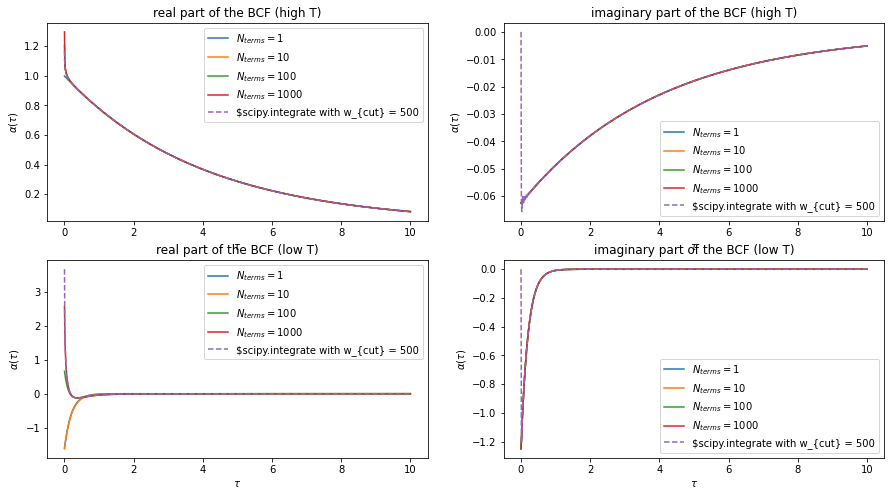

In [24]:
figure, axarray = plt.subplots(2, 2, figsize=(15, 8))
for i, N_terms in enumerate(N_termss):
    axarray[0][0].plot(taus, np.real(alphas_N_T_1[i]), label=r"$N_{terms} = "+str(N_terms)+"$")
    axarray[0][1].plot(taus, np.imag(alphas_N_T_1[i]), label=r"$N_{terms} = "+str(N_terms)+"$")
    axarray[1][0].plot(taus, np.real(alphas_N_T_2[i]), label=r"$N_{terms} = "+str(N_terms)+"$")
    axarray[1][1].plot(taus, np.imag(alphas_N_T_2[i]), label=r"$N_{terms} = "+str(N_terms)+"$")
axarray[0][0].plot(taus, np.real(alphas_quad_w_T_1[-1]), "--", label=r"$scipy.integrate with w_{cut} = 500")
axarray[0][1].plot(taus, np.imag(alphas_quad_w_T_1[-1]), "--", label=r"$scipy.integrate with w_{cut} = 500")
axarray[1][0].plot(taus, np.real(alphas_quad_w_T_2[-1]), "--", label=r"$scipy.integrate with w_{cut} = 500")
axarray[1][1].plot(taus, np.imag(alphas_quad_w_T_2[-1]), "--", label=r"$scipy.integrate with w_{cut} = 500")
axarray[0][0].set_xlabel(r"$\tau$")
axarray[0][0].set_ylabel(r"$\alpha(\tau)$")
axarray[0][1].set_xlabel(r"$\tau$")
axarray[0][1].set_ylabel(r"$\alpha(\tau)$")
axarray[1][0].set_xlabel(r"$\tau$")
axarray[1][0].set_ylabel(r"$\alpha(\tau)$")
axarray[1][1].set_xlabel(r"$\tau$")
axarray[1][1].set_ylabel(r"$\alpha(\tau)$")
axarray[0][0].set_title("real part of the BCF (high T)")
axarray[0][1].set_title("imaginary part of the BCF (high T)")
axarray[1][0].set_title("real part of the BCF (low T)")
axarray[1][1].set_title("imaginary part of the BCF (low T)")
axarray[0][0].legend()
axarray[0][1].legend()
axarray[1][0].legend()
axarray[1][1].legend()
plt.show()

We see that the approximation for a low amount of modes is not that good, especially for low temperatures. However, for large amount of modes, the results agree. The computation of the bath correlation function also takes considerably less time when using the exponential expansion.